Import Learning agent and User agent

set desired parameters

In [1]:

from bunny import Bunny

from Child1 import Child1

Sarsa = Bunny
Agent = Child1


Define functions for iterating the learning with learning algorithm and agent

In [2]:
import pandas as pd
import math

def simulateLearning(Sarsa, Agent, steps_N, task_reset_rate):

  sarsa = Sarsa()
  agent = Agent()

  task = sarsa.state.getVar('Task')
  task_succes = []

  reward = 0
  task_complete = False

  for step_index in range(steps_N):
    #Set Task Undone every 10th step
    if ( step_index % task_reset_rate == 0 and step_index != 0 ):
      task.set('Undone')
      if (not task_complete):
        task_succes.append(task_reset_rate)
      task_complete = False
    #calculate changes to Q table for last action taken and return new action
    action = sarsa.update(reward)
    #use action selected in last update
    result = agent.react(action, sarsa.state)
    #Check if task is done:
    if ( task.value == 'Done' and not task_complete ):
      task_succes.append( step_index % task_reset_rate + 1 )
      task_complete = True
    #calculate reward
    reward = sarsa.rewardFunction()

  #If last round failed, list needs to be completed
  if( not len(task_succes) == math.ceil(steps_N / task_reset_rate)  ):
    task_succes.append(task_reset_rate)

  return task_succes

def simulateLearningThreads(Sarsa, Agent, steps_N, task_reset_rate, thread_N):
  results = {}
  for thread in range(thread_N):
    result = simulateLearning(Sarsa, Agent, steps_N, task_reset_rate)
    results[ '#' + str(thread) ] = result

  df = pd.DataFrame(results).transpose()
  return df



To run the algortihm and create plots, you can set the amount of steps, task reset and thread count to be visualised.
The resultin graph should shot the developement of the algorithm

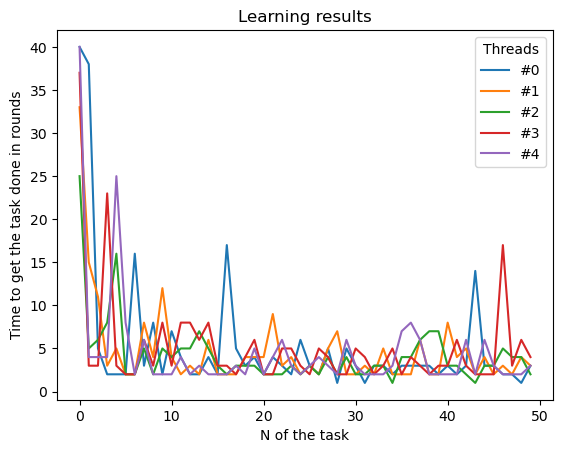

In [3]:
import matplotlib.pyplot as plt

# Run simulation and draw a plot
steps_N = 2000
task_reset_rate = 40
thread_N = 5

result = simulateLearningThreads(Sarsa, Agent, steps_N, task_reset_rate, thread_N)

# Create the line graph
result.T.plot(kind='line')

# Customize the graph
plt.xlabel('N of the task')
plt.ylabel('Time to get the task done in rounds')
plt.title('Learning results')
plt.legend(title='Threads')


# Display the graph
plt.show()
